# Hello and Welcome! 😊

# Final Project: Weather Prediction

Hey there! In this project, I am using **linear regression** to predict the **temperature** in **Houston** based on weather data from **NOAA**. 

TI start by collecting and analyzing the data with some **Exploratory Data Analysis** to get a feel for what’s going on. From there, I build and train a model—**Linear Regression** to predict the temperature. I then use a **Ranodm Forest Model** and comare the two. And I als measure their performance with **Mean Squared Error (MSE)**.


In [85]:
import os

# Fetch API key
noaa_api_key = os.getenv('NOAA_API_KEY')


In [97]:
import requests
import pandas as pd
import time

# Your NOAA API token
api_token = "zAvvXPhwqNMcbxxQVKtfeBbvWCIvZYCq"  # Replace with your actual API key

# Base URL for NOAA API
base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"

# Set up headers for authentication
headers = {
    'token': api_token
}

# Set the station ID for Houston (you can find the station ID on the NOAA website for Houston)
station_id = "GHCND:USW00012921"  # Example station for Houston

# Set the parameters for the API request
params = {
    'datasetid': 'GHCND',  # Global Historical Climatology Network - Daily
    'stationid': station_id,
    'datatypeid': 'TMAX',  # Daily maximum temperature (change this based on what data you need)
    'startdate': '',
    'enddate': '',
    'limit': 1000,  # Max number of records per request
}

# Function to pull data for a specific year
def get_weather_data_for_year(year):
    params['startdate'] = f"{year}-01-01"
    params['enddate'] = f"{year}-12-31"
    
    response = requests.get(base_url, headers=headers, params=params)
    
    # Print the request URL and status code for debugging
    print(f"Request URL: {response.url}")
    print(f"Status Code: {response.status_code}")
    
    if response.status_code == 200:
        # Get the data from the response
        data = response.json()
        # Check if the data is present
        if 'results' in data:
            return data['results']
        else:
            print(f"No data found for {year}.")
            return []
    else:
        print(f"Failed to retrieve data for {year}: {response.status_code}")
        print("Response content:", response.text)
        return []

# Loop through the years (2015-2024)
all_weather_data = []
for year in range(2015, 2025):
    print(f"Pulling data for {year}...")
    year_data = get_weather_data_for_year(year)
    print(f"Found {len(year_data)} records for {year}.")
    
    if year_data:
        all_weather_data.extend(year_data)
    time.sleep(3)  # Add a longer delay to prevent rate-limiting

# Create DataFrame from the data
df = pd.DataFrame(all_weather_data)

# Optional: Save to a CSV file
df.to_csv('houston_weather_2015_2024.csv', index=False)

print("Data saved to 'houston_weather_2015_2024.csv'")


Pulling data for 2015...
Request URL: https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND%3AUSW00012921&datatypeid=TMAX&startdate=2015-01-01&enddate=2015-12-31&limit=1000
Status Code: 200
Found 365 records for 2015.
Pulling data for 2016...
Request URL: https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND%3AUSW00012921&datatypeid=TMAX&startdate=2016-01-01&enddate=2016-12-31&limit=1000
Status Code: 503
Failed to retrieve data for 2016: 503
Response content: <!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>503 Service Unavailable</title>
</head><body>
<h1>Service Unavailable</h1>
<p>The server is temporarily unable to service your
request due to maintenance downtime or capacity
problems. Please try again later.</p>
<p>Additionally, a 503 Service Unavailable
error was encountered while trying to use an ErrorDocument to handle the request.</p>
</body></html>

Found 0 records for 2016.
Pulling data for 2017...
Request 

## Exploratory Data Analysis (EDA)

Here I am doing the EDA to understand the dataset, check for missing values, identify outliers, and visualize key trends before proceeding with model training.


Found 19 outliers:
            date datatype            station attributes  value
9     1420848000     TMAX  GHCND:USW00012921   ,,W,2400     28
57    1424995200     TMAX  GHCND:USW00012921   ,,W,2400     33
58    1425081600     TMAX  GHCND:USW00012921   ,,W,2400     39
370   1483660800     TMAX  GHCND:USW00012921   ,,W,2400     33
730   1514764800     TMAX  GHCND:USW00012921   ,,W,2400     -5
731   1514851200     TMAX  GHCND:USW00012921   ,,W,2400     11
746   1516147200     TMAX  GHCND:USW00012921   ,,W,2400     22
1503  1613088000     TMAX  GHCND:USW00012921   ,,W,2400     22
1504  1613174400     TMAX  GHCND:USW00012921   ,,W,2400      0
1505  1613260800     TMAX  GHCND:USW00012921   ,,W,2400    -10
1506  1613347200     TMAX  GHCND:USW00012921   ,,W,2400    -21
1507  1613433600     TMAX  GHCND:USW00012921   ,,W,2400    -32
1509  1613606400     TMAX  GHCND:USW00012921   ,,W,2400      0
1859  1643846400     TMAX  GHCND:USW00012921   ,,W,2400     33
2182  1671753600     TMAX  GHCND:USW

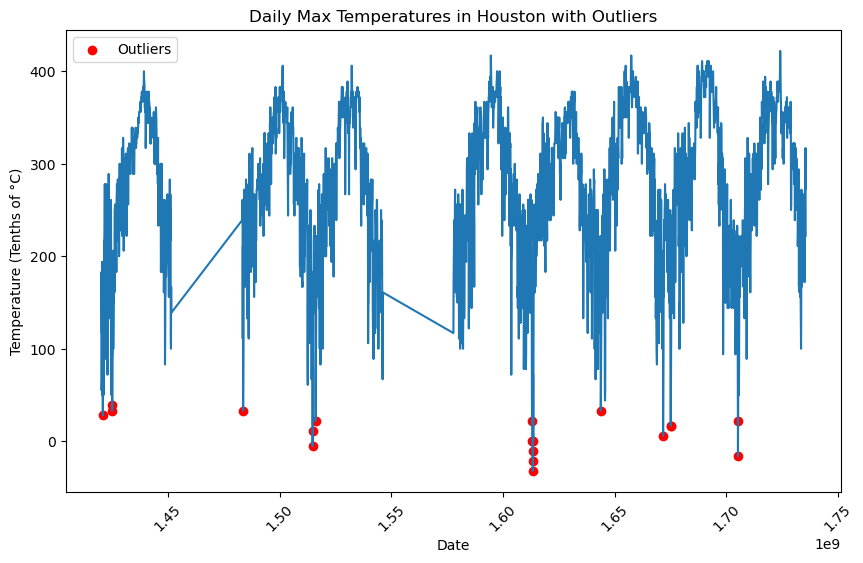

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("houston_weather_2015_2024.csv")

# Convert date
df["date"] = pd.to_datetime(df["date"]).astype(np.int64) // 10**9 

# Calculate the mean and standard deviation
mean_temp = df['value'].mean()
std_temp = df['value'].std()

# Define outliers 
outliers = df[(df['value'] < mean_temp - 3*std_temp) | (df['value'] > mean_temp + 3*std_temp)]
print(f"Found {len(outliers)} outliers:")
print(outliers)

# Plot the outlierssssss
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['value'])
plt.scatter(outliers['date'], outliers['value'], color='red', label='Outliers')
plt.title('Daily Max Temperatures in Houston with Outliers')
plt.xlabel('Date')
plt.ylabel('Temperature (Tenths of °C)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [100]:
df = pd.read_csv('houston_weather_2015_2024.csv')
df.head()


,date,datatype,station,attributes,value
0,2015-01-01T00:00:00,TMAX,GHCND:USW00012921,",,W,2400",56
1,2015-01-02T00:00:00,TMAX,GHCND:USW00012921,",,W,2400",67
2,2015-01-03T00:00:00,TMAX,GHCND:USW00012921,",,W,2400",183
3,2015-01-04T00:00:00,TMAX,GHCND:USW00012921,",,W,2400",139
4,2015-01-05T00:00:00,TMAX,GHCND:USW00012921,",,W,2400",117


In [103]:
 #Look to see if we have misisng vals 
df.isnull().sum()

date          0
datatype      0
station       0
attributes    0
value         0
dtype: int64

<Axes: xlabel='value', ylabel='Count'>

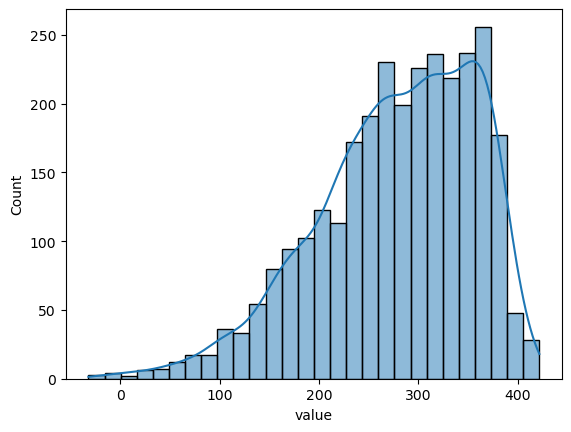

In [134]:
#Here I am just plotting the vlaue - value is the tempature lol
import seaborn as sns
sns.histplot(df['value'], kde=True)

In [136]:
# Here I am converting date to a datetime.
df['date'] = pd.to_datetime(df['date'])

# Here I am converting the temperature values to numeric vals
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Removing rows where temperature is missing
df = df.dropna(subset=['value'])  

## Model Evaluation  

Here, I check the models perfomrance using two key metrics:  

- **Root Mean Squared Error (RMSE):** Measures the average difference between actual and predicted values, giving an idea of how well the model fits the data. Lower RMSE indicates better performance.  
- **R-squared (R²) Score:** Represents the proportion of variance in the dependent variable explained by the model. Close to one is best.

In [155]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split  

# Load the temps data 
df = pd.read_csv('houston_weather_2015_2024.csv')

# Compute dynamic thresholds:
upper_threshold = df['value'].quantile(0.99) 
lower_threshold = df['value'].quantile(0.01) 

# Filter out values outside the threshold range 
df = df[(df['value'] >= lower_threshold) & (df['value'] <= upper_threshold)]

# Convert date column to datetime 
# Also extract year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Group + calculate the avg temp for each year
df_grouped = df.groupby('year')['value'].mean().reset_index()

# Extract years and temps
years = df_grouped['year'].values.reshape(-1, 1)
temperatures = df_grouped['value'].values

# Create linear regression model
model = LinearRegression()
model.fit(years, temperatures)

# Predict RMSE calculation
historical_predictions = model.predict(years)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(years, temperatures, test_size=0.2, random_state=42)

# Create th emodel 
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate the RMSE
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Predict on the full dataset - all the last 10 years
full_predictions = model.predict(years)

# Calculate RMSE for the while entire code dataset 
rmse_full = np.sqrt(mean_squared_error(temperatures, full_predictions))

# Print RMSE
print(f"RMSE on Test Set: {rmse_test:.2f}")
print(f"RMSE on Full Dataset: {rmse_full:.2f}")


RMSE on Test Set: 5.27
RMSE on Full Dataset: 4.30


# Predicting Future Temperatures - Linear Regression

## Overview
This script uses **Linear Regression** to analyze historical temperature data from NOAA, from **2015 to 2024** and predicts the average temperature for the years **2025 and 2026**.

## Steps in the Code:
1. **Load the Data**
   - NOAA allows users to get a API Key, so access free data. There are limitaitons, but for this assignment I just used that.
   - The historical average temperatures for each year from **2015 to 2024** are stored then sotred in numpy arrays.

3. **Train the Model**  
   - A **Linear Regression** model from **sklearn** is created and trained using the historical data.

4. **Make Predictions**  
   - The trained model predicts the average temperatures for the years **2025-2030**.

5. **Visualize the Results**  
   - A **matplotlib** plot is created to show:
   


## Temperature Trends Over the Years

In this step, I create a **line plot** to visualize the **temperature trends** in Houston from 2015 to 2024. 
1. **Data Loading**: Loading the weather data from the CSV file saved earlier.
2. **Data Processing**: Extracting the year from the date and calculate the **average temperature** for each year.
3. **Plotting**: Using `matplotlib`to show the average temperature per year.


Predicted temperature for 2025: 64.17 °F
Predicted temperature for 2026: 63.08 °F
Predicted temperature for 2027: 62.00 °F
Predicted temperature for 2028: 60.91 °F


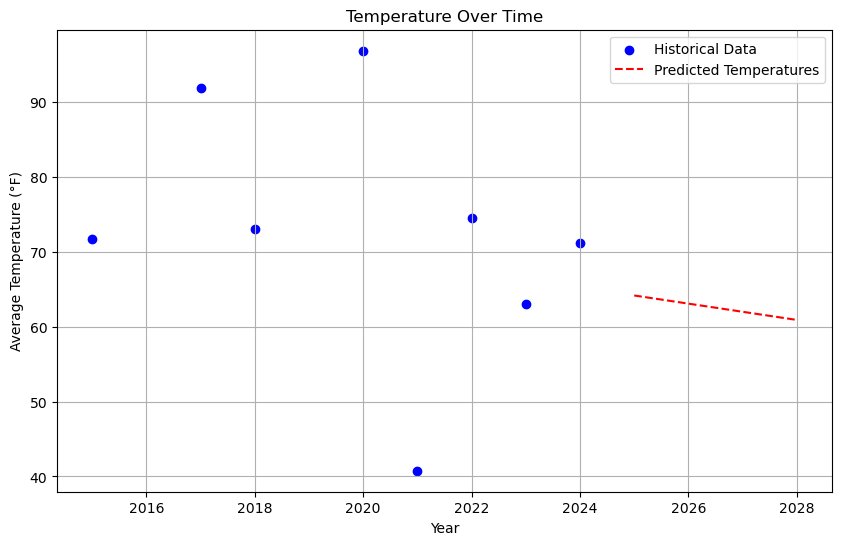

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the NOAA temperature data from the CSV file
df = pd.read_csv('houston_weather_2015_2024.csv')

# Mke sure 'date' is in datetime format and extract 'year'
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Set upper and lower thresholds for temperature - to remove any outliers
upper_threshold = 115 
lower_threshold = -50 

# Filter out values outside the threshold range
df_cleaned = df[(df['value'] >= lower_threshold) & (df['value'] <= upper_threshold)]

# Calculate the average temperature per year after cleaning
avg_temp_per_year = df_cleaned.groupby('year')['value'].mean().reset_index()

# Prepare the data for linear regression 
X = avg_temp_per_year['year'].values.reshape(-1, 1)  
y = avg_temp_per_year['value'].values 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


# Predict future temperatures 
future_years = np.array([2025, 2026, 2027, 2028]).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Print the predictions in Fahrenheit
for year, temp in zip(future_years.flatten(), future_predictions):
    print(f"Predicted temperature for {year}: {temp:.2f} °F")

# Plot historical and predicted data
plt.figure(figsize=(10, 6))
plt.scatter(avg_temp_per_year['year'], avg_temp_per_year['value'], color='blue', label='Historical Data')
plt.plot(future_years, future_predictions, color='red', label='Predicted Temperatures', linestyle='--')
plt.title('Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.grid(True)
plt.legend()
plt.show()


# Random Forest Model for Temp Predictions 🌡️
1. **Load the Data**
4. **Train the Random Forest**
5. **Make Predictions**

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load our. NOAA dataset
df = pd.read_csv("houston_weather_2015_2024.csv")

# Convert date
df["date"] = pd.to_datetime(df["date"]).astype(np.int64) // 10**9  
categorical_cols = ["datatype", "station", "attributes"]
df = pd.get_dummies(df, columns=categorical_cols)

# Define features 
# Drop target column
X = df.drop(columns=["value"])  
y = df["value"]

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Print model score
print("Model Score:", model.score(X_test, y_test))


Model Score: 0.8283534756706855


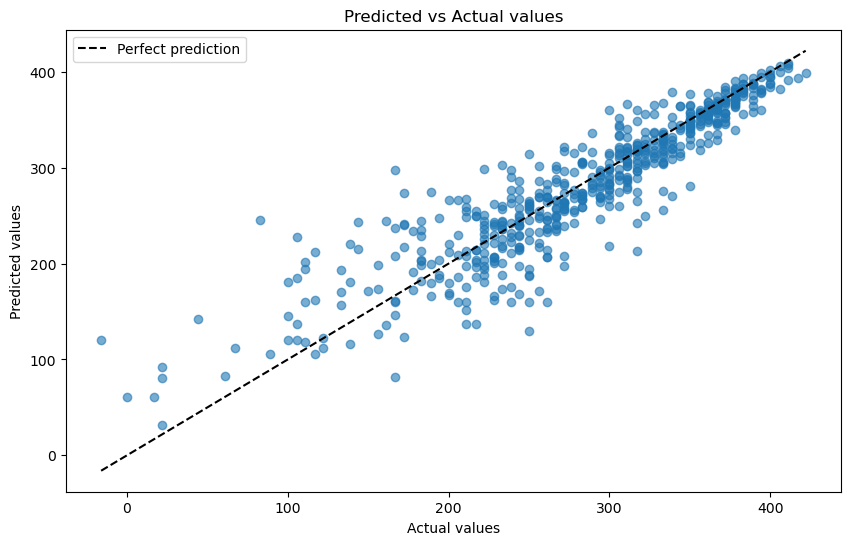

In [114]:
import matplotlib.pyplot as plt

# Make the predictions
y_pred = model.predict(X_test)

# Plot predicted vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Perfect prediction")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual values")
plt.legend()
plt.show()


Thank you for reviewing the analysis.:)

The model shows that the RMSE for both the test set and the full dataset indicates a reasonable fit, with some room for improvement. I wnat ot further model optimizations or consider additional features to enhance accuracy and hopefully dive into the domain of pedicitve analytics for commodity traders

In [149]:
cd /path/to/your/notebooks


[Errno 2] No such file or directory: '/path/to/your/notebooks'
/Users/Charity
